# Daniel 11 Research

### The TF prelude...

In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [52]:
A = use('bhsa', hoist=globals())

	connecting to online GitHub repo annotation/app-bhsa ... connected
Using TF-app in C:\Users\Oliver Glanz/text-fabric-data/annotation/app-bhsa/code:
	rv1.2=#5fdf1778d51d938bfe80b37b415e36618e50190c (latest release)
	connecting to online GitHub repo etcbc/bhsa ... connected
Using data in C:\Users\Oliver Glanz/text-fabric-data/etcbc/bhsa/tf/c:
	rv1.6 (latest release)
	connecting to online GitHub repo etcbc/phono ... connected
Using data in C:\Users\Oliver Glanz/text-fabric-data/etcbc/phono/tf/c:
	r1.2 (latest release)
	connecting to online GitHub repo etcbc/parallels ... connected
Using data in C:\Users\Oliver Glanz/text-fabric-data/etcbc/parallels/tf/c:
	r1.2 (latest release)
   |     0.00s No structure info in otext, the structure part of the T-API cannot be used


# Dan 11:1
## Linguistic Challenges
### clause no01 - issue01
#### unexpected congruence between personal pronoun and pronominal suffix attached to predicate complement
There is an unexpected congruence between the personal pronoun (`prps`) as subject and the subject suffix (`prs`) of the predicate complement (`PreC`). Both are 1sgC.
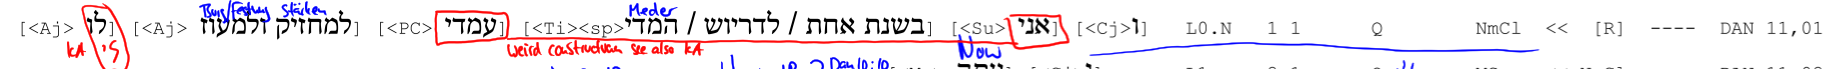

In the following query I seek to find other cases in which such a congruence takes place. 

In [53]:
CongruenceOfSubjectandPreCSuffix='''
clause
    phrase function=Subj
        w1:word sp=prps ps=p1|p2
    phrase function=PreC
        w2:word prs_ps=p1|p2|p3
w1 .ps=prs_ps. w2
'''
CongruenceOfSubjectandPreCSuffix  = A.search(CongruenceOfSubjectandPreCSuffix)
A.table(CongruenceOfSubjectandPreCSuffix, start=1, end=12, condensed=True)

  3.45s 12 results


#### Results and Questions
- As can be seen the case in Dan 11:1 is exceptional and does nowhere else appear. The other 11 cases do not count as the suffix does not appear on the head of the `PreC`and is either part of a prepositional phrase or a regens-rectum construction (cf. Judges 6:15). The following query shows a more restricted query that excludes prepositional phrases and regens-rectum constructions by defining that the suffixed word needs to stand at the head of the `PreC` phrase and cannot be attached to a preposition (`prep`):

In [54]:
CongruenceOfSubjectandSubjectSuffixAtPreCHead='''
clause
    p1:phrase function=Subj
        w1:word sp=prps ps=p1|p2
    p2:phrase function=PreC
        w2:word prs_ps=p1|p2|p3 sp#prep
w1 .ps=prs_ps. w2
p2 =: w2
'''
CongruenceOfSubjectandSubjectSuffixAtPreCHead  = A.search(CongruenceOfSubjectandSubjectSuffixAtPreCHead)
A.table(CongruenceOfSubjectandSubjectSuffixAtPreCHead, start=1, end=12, condensed=True)

  3.56s 1 result


n,p,verse,clause,word,phrase,phrase,word
1,Daniel 11:1,וַאֲנִי֙ בִּשְׁנַ֣ת אַחַ֔ת לְדָרְיָ֖וֶשׁ הַמָּדִ֑י עָמְדִ֛י לְמַחֲזִ֥יק וּלְמָעֹ֖וז לֹֽו׃,וַאֲנִי֙ בִּשְׁנַ֣ת אַחַ֔ת לְדָרְיָ֖וֶשׁ הַמָּדִ֑י עָמְדִ֛י לְמַחֲזִ֥יק וּלְמָעֹ֖וז לֹֽו׃,אֲנִי֙,אֲנִי֙,עָמְדִ֛י,עָמְדִ֛י


- One would expect that the the `PreC` (עֹמֶד) is actually made out of a participal form of עמד (as is done in the Syriaca: || c l עֹמֵד cf 𝔖 ||) instead of the nominal form עֹמֶד. However, the above queries also searches for participal `PreC`'s. Thus, even when changing the analysis of עֹמֶד into עֹמֵד the syntax of the first clause of Dan 11:1 would still represent an unkown grammatical construction (assuming this is classical or transitional Biblical Hebrew). While the Hebrew does not appear to make sense (at least grammatically speaking), both the Old Greek and Theodotion make sense. Theodotion renders:καὶ ἐγὼ ἐν ἔτει πρώτῳ Κύρου ἔστην εἰς κράτος καὶ ἰσχύν [Rahlfs Alternate Text](https://ref.ly/logosres/lxxsesbalt?ref=BibleLXX.Da11.1&off=2&ctx=11+1%EF%BB%BF~%CE%BA%CE%B1%CE%B9%CC%80+%CE%B5%CC%93%CE%B3%CF%89%CC%80+%CE%B5%CC%93%CE%BD+%CE%B5%CC%93%CC%81%CF%84%CE%B5%CE%B9+%CF%80%CF%81%CF%89%CC%81%CF%84%CF%89%CD%85+%CE%9A%CF%85%CC%81%CF%81%CE%BF)// "And I in the first year of Cyrus was [I] standing for power and strength."
- Insightful is the rendering in 4Q114(4Q Dan c) with עמדתי which solves the problem ("I, I was standing"). 
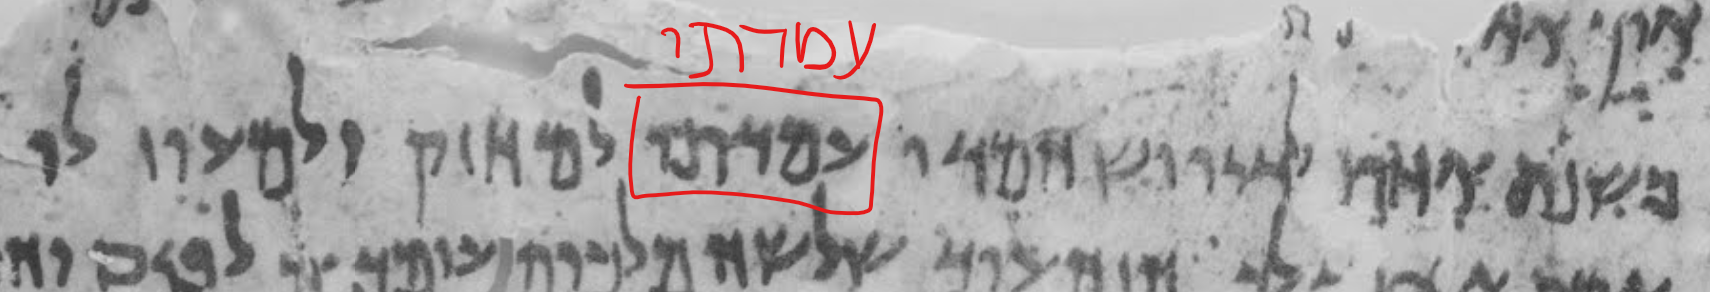
[See 4Q114 in Leon Levy Library](https://www.deadseascrolls.org.il/explore-the-archive/image/B-281137)

    The text was found with the following query on the TF-DSS-corpus:

```
Dan11_1_DSS = '''
scroll
    word book=Dan chapter=11 verse=1
'''
Dan11_1_DSS  = A.search(Dan11_1_DSS)
A.show(Dan11_1_DSS, start=1, end=48, condensed=True, fmt='layout-orig-full')
```

- As a potential translation one could suggest "I *am/was doing* my standing...". However, in classical/transitional Biblical Hebrew nominal clauses (`NmCl`) do not assume a *word of doing* but a *word of being*. This could have changed in late Biblical Hebrew, however. Research on this matter would be required...

### clause no01 - issue02
#### textcritical issue with final PP
At the end of the clause the construction rendered "for strength and for fortress for him" is accaptabel but complicated. This might explain why the Syriaca renders **d l c Ms 𝔖 לִי; cf 10,21a–a** similar to the Old Greek which renders **εἶπέν μοι ἐνισχῦσαι καὶ ἀνδρίζεσθαι** (trans: he told me to be strong and couragious; cf Dan 10:21). Theodotion omits the entire phrase. Except 4Q114(4Q Dan c), no other major witness seems to follow the MT. If the MT is followed the 3sgM suffix would refer to Darius. Howver 4Q114(4Q Dan c) renders the text of issue01 in such a way that it solves the problem.

# Dan 11:2

### clause no06 
There is an unexpected phrase construction at the end of the final clause of v2:
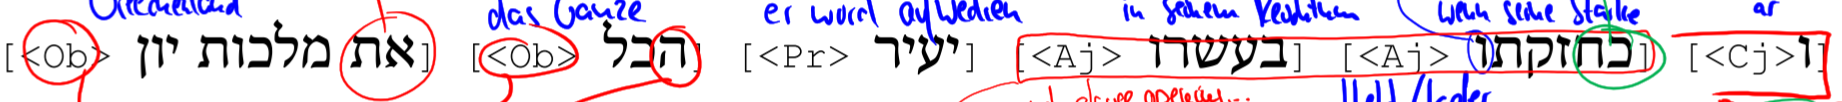
Two issues are suprising and interconnected. 
#### unexpected object phrase without nota accusativi - issue01
First, if we assume a double object construction the determined הַכֹּ֔ל should have been preceded by the object marker אֵת. Since this is not the case one is inclined to take הַכֹּ֔ל as the subject of יָעִ֣יר rendering "and the all stirred up the kingdom of Greece". Here the question needs to be answered whether can be used as subject at all, and if it appears elswhere in object position without nota accusativi when even when determined.
#### unexpected double object construction with the verb עור - issue02
Second, if הַכֹּ֔ל is taken as an object we have a double object construction in this clause, which would deviate from standard Hebrew language practice. This requires a valence investigation into עור.

The Linguistic challenge explains also the textcritical situation **b–b dub; 𝔊 pro יעיר ἐπαναστήσεται = יֵעוֹר; 2 Mss om את, 2 Mss pro eodem אֶל (sic vel עַל prb l); l יעיר שַׂר הכל?**. However, 4Q114(4Q Dan c) supports the MT:
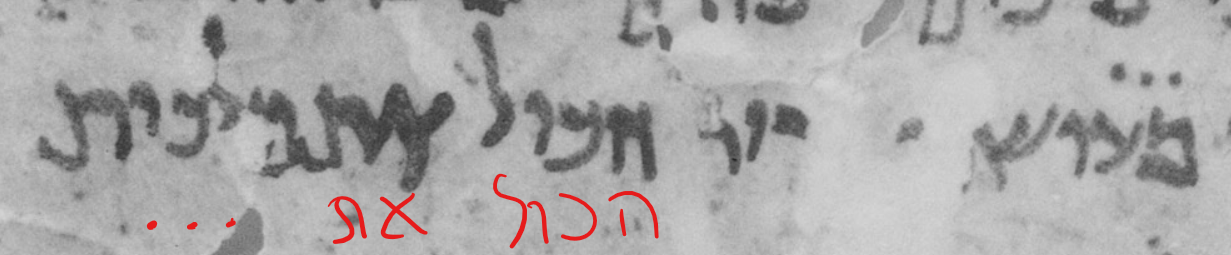

[See 4Q114 in Leon Levy Library](https://www.deadseascrolls.org.il/explore-the-archive/image/B-281137)
    
    The text was found with the following query on the TF-DSS-corpus:

```
Dan11_2_DSS = '''
scroll
    word book=Dan chapter=11 verse=2
'''
Dan11_2_DSS  = A.search(Dan11_2_DSS)
A.show(Dan11_2_DSS, start=1, end=48, condensed=True, fmt='layout-orig-full')
```


#### queries on issue01

In [55]:
HaKwlAsSubject='''
clause
    p1:phrase function=Subj
        w1:word lex=H
        w2:word lex=KL/
p1 =: w1
p1 := w2
w1 <: w2
'''
HaKwlAsSubject  = A.search(HaKwlAsSubject)
A.table(HaKwlAsSubject, start=1, end=10, condensed=True)

  2.84s 30 results


n,p,verse,phrase,word,clause,word
1,Joshua 21:45,לֹֽא־נָפַ֣ל דָּבָ֔ר מִכֹּל֙ הַדָּבָ֣ר הַטֹּ֔וב אֲשֶׁר־דִּבֶּ֥ר יְהוָ֖ה אֶל־בֵּ֣ית יִשְׂרָאֵ֑ל הַכֹּ֖ל בָּֽא׃ פ,הַכֹּ֖ל,כֹּ֖ל,הַכֹּ֖ל בָּֽא׃ פ,הַ
2,Joshua 23:14,וְהִנֵּ֨ה אָנֹכִ֤י הֹולֵךְ֙ הַיֹּ֔ום בְּדֶ֖רֶךְ כָּל־הָאָ֑רֶץ וִידַעְתֶּ֞ם בְּכָל־לְבַבְכֶ֣ם וּבְכָל־נַפְשְׁכֶ֗ם כִּ֣י לֹֽא־נָפַל֩ דָּבָ֨ר אֶחָ֜ד מִכֹּ֣ל׀ הַדְּבָרִ֣ים הַטֹּובִ֗ים אֲשֶׁ֨ר דִּבֶּ֜ר יְהוָ֤ה אֱלֹהֵיכֶם֙ עֲלֵיכֶ֔ם הַכֹּל֙ בָּ֣אוּ לָכֶ֔ם לֹֽא־נָפַ֥ל מִמֶּ֖נּוּ דָּבָ֥ר אֶחָֽד׃,הַכֹּל֙,הַ,כֹּל֙,הַכֹּל֙ בָּ֣אוּ לָכֶ֔ם
3,2_Samuel 17:3,וְאָשִׁ֥יבָה כָל־הָעָ֖ם אֵלֶ֑יךָ כְּשׁ֣וּב הַכֹּ֔ל הָאִישׁ֙ אֲשֶׁ֣ר אַתָּ֣ה מְבַקֵּ֔שׁ כָּל־הָעָ֖ם יִהְיֶ֥ה שָׁלֹֽום׃,כֹּ֔ל,הַכֹּ֔ל,כְּשׁ֣וּב הַכֹּ֔ל,הַ
4,1_Kings 6:18,וְאֶ֤רֶז אֶל־הַבַּ֨יִת֙ פְּנִ֔ימָה מִקְלַ֣עַת פְּקָעִ֔ים וּפְטוּרֵ֖י צִצִּ֑ים הַכֹּ֣ל אֶ֔רֶז אֵ֥ין אֶ֖בֶן נִרְאָֽה׃,הַכֹּ֣ל אֶ֔רֶז,הַ,הַכֹּ֣ל,כֹּ֣ל
5,1_Kings 7:33,וּמַֽעֲשֵׂה֙ הָאֹ֣ופַנִּ֔ים כְּמַעֲשֵׂ֖ה אֹופַ֣ן הַמֶּרְכָּבָ֑ה יְדֹותָ֣ם וְגַבֵּיהֶ֗ם וְחִשֻּׁקֵיהֶ֛ם וְחִשֻּׁרֵיהֶ֖ם הַכֹּ֥ל מוּצָֽק׃,הַכֹּ֥ל,הַ,הַכֹּ֥ל מוּצָֽק׃,כֹּ֥ל
6,2_Kings 24:16,וְאֵת֩ כָּל־אַנְשֵׁ֨י הַחַ֜יִל שִׁבְעַ֣ת אֲלָפִ֗ים וְהֶחָרָ֤שׁ וְהַמַּסְגֵּר֙ אֶ֔לֶף הַכֹּ֕ל גִּבֹּורִ֖ים עֹשֵׂ֣י מִלְחָמָ֑ה וַיְבִיאֵ֧ם מֶֽלֶךְ־בָּבֶ֛ל גֹּולָ֖ה בָּבֶֽלָה׃,הַכֹּ֕ל גִּבֹּורִ֖ים,כֹּ֕ל,הַ,הַכֹּ֕ל
7,2_Kings 25:17,שְׁמֹנֶה֩ עֶשְׂרֵ֨ה אַמָּ֜ה קֹומַ֣ת׀ הָעַמּ֣וּד הָאֶחָ֗ד וְכֹתֶ֨רֶת עָלָ֥יו׀ נְחֹשֶׁת֮ וְקֹומַ֣ת הַכֹּתֶרֶת֮ שָׁלֹ֣שׁ אַמֹּות֒ וּשְׂבָכָ֨ה וְרִמֹּנִ֧ים עַֽל־הַכֹּתֶ֛רֶת סָבִ֖יב הַכֹּ֣ל נְחֹ֑שֶׁת וְכָאֵ֛לֶּה לַֽעַמּ֥וּד הַשֵּׁנִ֖י עַל־הַשְּׂבָכָֽה׃,הַכֹּ֣ל נְחֹ֑שֶׁת,הַכֹּ֣ל,הַ,כֹּ֣ל
8,Jeremiah 52:22,וְכֹתֶ֨רֶת עָלָ֜יו נְחֹ֗שֶׁת וְקֹומַ֨ת הַכֹּתֶ֥רֶת הָאַחַת֮ חָמֵ֣שׁ אַמֹּות֒ וּשְׂבָכָ֨ה וְרִמֹּונִ֧ים עַֽל־הַכֹּותֶ֛רֶת סָבִ֖יב הַכֹּ֣ל נְחֹ֑שֶׁת וְכָאֵ֛לֶּה לַֽעַמּ֥וּד הַשֵּׁנִ֖י וְרִמֹּונִֽים׃,כֹּ֣ל,הַכֹּ֣ל,הַכֹּ֣ל נְחֹ֑שֶׁת,הַ
9,Psalms 14:3,הַכֹּ֥ל סָר֮ יַחְדָּ֪ו נֶ֫אֱלָ֥חוּ אֵ֤ין עֹֽשֵׂה־טֹ֑וב אֵ֝֗ין גַּם־אֶחָֽד׃,הַכֹּ֥ל סָר֮,הַ,הַכֹּ֥ל,כֹּ֥ל
10,Psalms 119:91,לְֽ֭מִשְׁפָּטֶיךָ עָמְד֣וּ הַיֹּ֑ום כִּ֖י הַכֹּ֣ל עֲבָדֶֽיךָ׃,הַכֹּ֣ל,כִּ֖י הַכֹּ֣ל עֲבָדֶֽיךָ׃,הַ,כֹּ֣ל


The above query shows that הַכֹּ֔ל can function as subject phrase. 
Lets now look for הַכֹּ֔ל as representing an object phrase.

In [56]:
HaKwlAsObjectWithoutEt='''
clause
    p1:phrase function=Objc
        w1:word lex=H
        w2:word lex=KL/
p1 =: w1
p1 := w2
w1 <: w2
'''
HaKwlAsObjectWithoutEt  = A.search(HaKwlAsObjectWithoutEt)
A.table(HaKwlAsObjectWithoutEt, start=1, end=10, condensed=True)

  2.49s 13 results


n,p,verse,phrase,clause,word,word
1,Exodus 29:24,וְשַׂמְתָּ֣ הַכֹּ֔ל עַ֚ל כַּפֵּ֣י אַהֲרֹ֔ן וְעַ֖ל כַּפֵּ֣י בָנָ֑יו וְהֵנַפְתָּ֥ אֹתָ֛ם תְּנוּפָ֖ה לִפְנֵ֥י יְהוָֽה׃,הַכֹּ֔ל,וְשַׂמְתָּ֣ הַכֹּ֔ל עַ֚ל כַּפֵּ֣י אַהֲרֹ֔ן וְעַ֖ל כַּפֵּ֣י בָנָ֑יו,הַ,כֹּ֔ל
2,1_Samuel 30:19,וְלֹ֣א נֶעְדַּר־לָ֠הֶם מִן־הַקָּטֹ֨ן וְעַד־הַגָּדֹ֜ול וְעַד־בָּנִ֤ים וּבָנֹות֙ וּמִשָּׁלָ֔ל וְעַ֛ד כָּל־אֲשֶׁ֥ר לָקְח֖וּ לָהֶ֑ם הַכֹּ֖ל הֵשִׁ֥יב דָּוִֽד׃,הַ,כֹּ֖ל,הַכֹּ֖ל,הַכֹּ֖ל הֵשִׁ֥יב דָּוִֽד׃
3,2_Samuel 24:23,הַכֹּ֗ל נָתַ֛ן אֲרַ֥וְנָה הַמֶּ֖לֶךְ לַמֶּ֑לֶךְ ס וַיֹּ֤אמֶר אֲרַ֨וְנָה֙ אֶל־הַמֶּ֔לֶךְ יְהוָ֥ה אֱלֹהֶ֖יךָ יִרְצֶֽךָ׃,כֹּ֗ל,הַכֹּ֗ל,הַכֹּ֗ל נָתַ֛ן אֲרַ֥וְנָה לַמֶּ֑לֶךְ ס,הַ
4,Isaiah 65:8,כֹּ֣ה׀ אָמַ֣ר יְהוָ֗ה כַּאֲשֶׁ֨ר יִמָּצֵ֤א הַתִּירֹושׁ֙ בָּֽאֶשְׁכֹּ֔ול וְאָמַר֙ אַל־תַּשְׁחִיתֵ֔הוּ כִּ֥י בְרָכָ֖ה בֹּ֑ו כֵּ֤ן אֶֽעֱשֶׂה֙ לְמַ֣עַן עֲבָדַ֔י לְבִלְתִּ֖י הַֽשְׁחִ֥ית הַכֹּֽל׃,הַכֹּֽל׃,הַ,כֹּֽל׃,לְבִלְתִּ֖י הַֽשְׁחִ֥ית הַכֹּֽל׃
5,Ezekiel 7:14,תָּקְע֤וּ בַתָּקֹ֨ועַ֙ וְהָכִ֣ין הַכֹּ֔ל וְאֵ֥ין הֹלֵ֖ךְ לַמִּלְחָמָ֑ה כִּ֥י חֲרֹונִ֖י אֶל־כָּל־הֲמֹונָֽהּ׃,הַ,כֹּ֔ל,הַכֹּ֔ל,וְהָכִ֣ין הַכֹּ֔ל
6,Psalms 49:18,כִּ֤י לֹ֣א בְ֭מֹותֹו יִקַּ֣ח הַכֹּ֑ל לֹא־יֵרֵ֖ד אַחֲרָ֣יו כְּבֹודֹֽו׃,כֹּ֑ל,כִּ֤י לֹ֣א בְ֭מֹותֹו יִקַּ֣ח הַכֹּ֑ל,הַכֹּ֑ל,הַ
7,Ecclesiastes 9:1,כִּ֣י אֶת־כָּל־זֶ֞ה נָתַ֤תִּי אֶל־לִבִּי֙ וְלָב֣וּר אֶת־כָּל־זֶ֔ה אֲשֶׁ֨ר הַצַּדִּיקִ֧ים וְהַחֲכָמִ֛ים וַעֲבָדֵיהֶ֖ם בְּיַ֣ד הָאֱלֹהִ֑ים גַּֽם־אַהֲבָ֣ה גַם־שִׂנְאָ֗ה אֵ֤ין יֹודֵ֨עַ֙ הָֽאָדָ֔ם הַכֹּ֖ל לִפְנֵיהֶֽם׃,כֹּ֖ל,הַכֹּ֖ל,אֵ֤ין יֹודֵ֨עַ֙ הָֽאָדָ֔ם הַכֹּ֖ל לִפְנֵיהֶֽם׃,הַ
8,Daniel 11:2,וְעַתָּ֕ה אֱמֶ֖ת אַגִּ֣יד לָ֑ךְ הִנֵּה־עֹוד֩ שְׁלֹשָׁ֨ה מְלָכִ֜ים עֹמְדִ֣ים לְפָרַ֗ס וְהָֽרְבִיעִי֙ יַעֲשִׁ֤יר עֹֽשֶׁר־גָּדֹול֙ מִכֹּ֔ל וּכְחֶזְקָתֹ֣ו בְעָשְׁרֹ֔ו יָעִ֣יר הַכֹּ֔ל אֵ֖ת מַלְכ֥וּת יָוָֽן׃,הַ,כֹּ֔ל,הַכֹּ֔ל,וּכְחֶזְקָתֹ֣ו בְעָשְׁרֹ֔ו יָעִ֣יר הַכֹּ֔ל אֵ֖ת מַלְכ֥וּת יָוָֽן׃
9,Ezra 1:11,כָּל־כֵּלִים֙ לַזָּהָ֣ב וְלַכֶּ֔סֶף חֲמֵ֥שֶׁת אֲלָפִ֖ים וְאַרְבַּ֣ע מֵאֹ֑ות הַכֹּ֞ל הֶעֱלָ֣ה שֵׁשְׁבַּצַּ֗ר עִ֚ם הֵעָלֹ֣ות הַגֹּולָ֔ה מִבָּבֶ֖ל לִירוּשָׁלִָֽם׃ פ,הַכֹּ֞ל הֶעֱלָ֣ה שֵׁשְׁבַּצַּ֗ר,הַ,כֹּ֞ל,הַכֹּ֞ל
10,1_Chronicles 21:23,וַיֹּ֨אמֶר אָרְנָ֤ן אֶל־דָּוִיד֙ קַֽח־לָ֔ךְ וְיַ֛עַשׂ אֲדֹנִ֥י הַמֶּ֖לֶךְ הַטֹּ֣וב בְּעֵינָ֑יו רְאֵה֩ נָתַ֨תִּי הַבָּקָ֜ר לָֽעֹלֹ֗ות וְהַמֹּורִגִּ֧ים לָעֵצִ֛ים וְהַחִטִּ֥ים לַמִּנְחָ֖ה הַכֹּ֥ל נָתָֽתִּי׃,הַכֹּ֥ל,הַ,הַכֹּ֥ל נָתָֽתִּי׃,כֹּ֥ל


The query shows that although not often it is possible to have הַכֹּ֔ל function as object phrase without nota accusativi.13 cases can be found. 

In [57]:
HaKwlAsObjectWithEt='''
clause
    p1:phrase function=Objc
        w0:word lex=>T
        w1:word lex=H
        w2:word lex=KL/
p1 =: w0
p1 := w2
w0 <: w1
w1 <: w2
'''
HaKwlAsObjectWithEt  = A.search(HaKwlAsObjectWithEt)
A.table(HaKwlAsObjectWithEt, start=1, end=10, condensed=True)

  3.56s 11 results


n,p,verse,phrase,clause,word,word,word
1,Leviticus 1:9,וְקִרְבֹּ֥ו וּכְרָעָ֖יו יִרְחַ֣ץ בַּמָּ֑יִם וְהִקְטִ֨יר הַכֹּהֵ֤ן אֶת־הַכֹּל֙ הַמִּזְבֵּ֔חָה עֹלָ֛ה אִשֵּׁ֥ה רֵֽיחַ־נִיחֹ֖וחַ לַֽיהוָֽה׃ ס,אֶת־הַכֹּל֙,וְהִקְטִ֨יר הַכֹּהֵ֤ן אֶת־הַכֹּל֙ הַמִּזְבֵּ֔חָה,אֶת־,הַ,כֹּל֙
2,Leviticus 1:13,וְהַקֶּ֥רֶב וְהַכְּרָעַ֖יִם יִרְחַ֣ץ בַּמָּ֑יִם וְהִקְרִ֨יב הַכֹּהֵ֤ן אֶת־הַכֹּל֙ וְהִקְטִ֣יר הַמִּזְבֵּ֔חָה עֹלָ֣ה ה֗וּא אִשֵּׁ֛ה רֵ֥יחַ נִיחֹ֖חַ לַיהוָֽה׃ פ,אֶת־,הַ,כֹּל֙,אֶת־הַכֹּל֙,וְהִקְרִ֨יב הַכֹּהֵ֤ן אֶת־הַכֹּל֙
3,Leviticus 8:27,וַיִּתֵּ֣ן אֶת־הַכֹּ֔ל עַ֚ל כַּפֵּ֣י אַהֲרֹ֔ן וְעַ֖ל כַּפֵּ֣י בָנָ֑יו וַיָּ֧נֶף אֹתָ֛ם תְּנוּפָ֖ה לִפְנֵ֥י יְהוָֽה׃,אֶת־,הַ,כֹּ֔ל,וַיִּתֵּ֣ן אֶת־הַכֹּ֔ל עַ֚ל כַּפֵּ֣י אַהֲרֹ֔ן וְעַ֖ל כַּפֵּ֣י בָנָ֑יו,אֶת־הַכֹּ֔ל
4,Deuteronomy 2:36,מֵֽעֲרֹעֵ֡ר אֲשֶׁר֩ עַל־שְׂפַת־נַ֨חַל אַרְנֹ֜ן וְהָעִ֨יר אֲשֶׁ֤ר בַּנַּ֨חַל֙ וְעַד־הַגִּלְעָ֔ד לֹ֤א הָֽיְתָה֙ קִרְיָ֔ה אֲשֶׁ֥ר שָׂגְבָ֖ה מִמֶּ֑נּוּ אֶת־הַכֹּ֕ל נָתַ֛ן יְהוָ֥ה אֱלֹהֵ֖ינוּ לְפָנֵֽינוּ׃,אֶת־הַכֹּ֕ל,אֶת־הַכֹּ֕ל נָתַ֛ן יְהוָ֥ה אֱלֹהֵ֖ינוּ לְפָנֵֽינוּ׃,אֶת־,הַ,כֹּ֕ל
5,Joshua 11:19,לֹֽא־הָיְתָ֣ה עִ֗יר אֲשֶׁ֤ר הִשְׁלִ֨ימָה֙ אֶל־בְּנֵ֣י יִשְׂרָאֵ֔ל בִּלְתִּ֥י הַחִוִּ֖י יֹשְׁבֵ֣י גִבְעֹ֑ון אֶת־הַכֹּ֖ל לָקְח֥וּ בַמִּלְחָמָֽה׃,אֶת־,אֶת־הַכֹּ֖ל לָקְח֥וּ בַמִּלְחָמָֽה׃,הַ,כֹּ֖ל,אֶת־הַכֹּ֖ל
6,1_Kings 14:26,וַיִּקַּ֞ח אֶת־אֹצְרֹ֣ות בֵּית־יְהוָ֗ה וְאֶת־אֹֽוצְרֹות֙ בֵּ֣ית הַמֶּ֔לֶךְ וְאֶת־הַכֹּ֖ל לָקָ֑ח וַיִּקַּח֙ אֶת־כָּל־מָגִנֵּ֣י הַזָּהָ֔ב אֲשֶׁ֥ר עָשָׂ֖ה שְׁלֹמֹֽה׃,הַ,וְאֶת־הַכֹּ֖ל לָקָ֑ח,כֹּ֖ל,אֶת־הַכֹּ֖ל,אֶת־
7,Ecclesiastes 3:11,אֶת־הַכֹּ֥ל עָשָׂ֖ה יָפֶ֣ה בְעִתֹּ֑ו גַּ֤ם אֶת־הָעֹלָם֙ נָתַ֣ן בְּלִבָּ֔ם מִבְּלִ֞י אֲשֶׁ֧ר לֹא־יִמְצָ֣א הָאָדָ֗ם אֶת־הַֽמַּעֲשֶׂ֛ה אֲשֶׁר־עָשָׂ֥ה הָאֱלֹהִ֖ים מֵרֹ֥אשׁ וְעַד־סֹֽוף׃,אֶת־הַכֹּ֥ל עָשָׂ֖ה יָפֶ֣ה בְעִתֹּ֑ו,אֶת־,הַ,כֹּ֥ל,אֶת־הַכֹּ֥ל
8,Ecclesiastes 7:15,אֶת־הַכֹּ֥ל רָאִ֖יתִי בִּימֵ֣י הֶבְלִ֑י יֵ֤שׁ צַדִּיק֙ אֹבֵ֣ד בְּצִדְקֹ֔ו וְיֵ֣שׁ רָשָׁ֔ע מַאֲרִ֖יךְ בְּרָעָתֹֽו׃,אֶת־הַכֹּ֥ל רָאִ֖יתִי בִּימֵ֣י הֶבְלִ֑י,אֶת־,הַ,כֹּ֥ל,אֶת־הַכֹּ֥ל
9,Ecclesiastes 10:19,לִשְׂחֹוק֙ עֹשִׂ֣ים לֶ֔חֶם וְיַ֖יִן יְשַׂמַּ֣ח חַיִּ֑ים וְהַכֶּ֖סֶף יַעֲנֶ֥ה אֶת־הַכֹּֽל׃,אֶת־הַכֹּֽל׃,וְהַכֶּ֖סֶף יַעֲנֶ֥ה אֶת־הַכֹּֽל׃,אֶת־,הַ,כֹּֽל׃
10,Ecclesiastes 11:5,כַּאֲשֶׁ֨ר אֵֽינְךָ֤ יֹודֵ֨עַ֙ מַה־דֶּ֣רֶךְ הָר֔וּחַ כַּעֲצָמִ֖ים בְּבֶ֣טֶן הַמְּלֵאָ֑ה כָּ֗כָה לֹ֤א תֵדַע֙ אֶת־מַעֲשֵׂ֣ה הָֽאֱלֹהִ֔ים אֲשֶׁ֥ר יַעֲשֶׂ֖ה אֶת־הַכֹּֽל׃,אֶת־,הַ,אֲשֶׁ֥ר יַעֲשֶׂ֖ה אֶת־הַכֹּֽל׃,כֹּֽל׃,אֶת־הַכֹּֽל׃


The query shows that although not often it is possible to have הַכֹּ֔ל function as object phrase with the expected nota accusativi.11 cases can be found.

##### Conclusion
While it is more likely to have הַכֹּ֔ל function as subject (30x) one cannot exlucde it from being an object (13x) either.

#### queries on issue02

In [58]:
DoubleObjectwithAwake='''
clause
    phrase function=Pred
       word lex=<WR[
    objp1:phrase function=Objc
    objp2:phrase function=Objc
objp1 < objp2
'''
DoubleObjectwithAwake  = A.search(DoubleObjectwithAwake)
A.show(DoubleObjectwithAwake, start=1, end=12, condensed=True)

  2.84s 1 result


As expected, a double object construction with עור is akward and not found anywhere else. Lets see whether a single object construction is more normal:

In [59]:
SingleObjectwithAwake='''
clause
    phrase function=Pred
       word lex=<WR[
    phrase function=Objc
'''
SingleObjectwithAwake  = A.search(SingleObjectwithAwake)
A.show(SingleObjectwithAwake, start=1, end=12, condensed=True)

  2.24s 29 results


### Conclusion on issue01+02
When considering the insights from the above queries for issue01 and issue02 I suggest to translate the final clause of v2 as follows "And (the) everyting stirs up the kingdom of Greece".